# Exploratory Data Analysis of Housing Data for Ames, Iowa

Analysis is targeted towards determining the characteristics of a machine learning model that can predict sale price accurately.

In [1]:
# Imports for data wrangling and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set pandas options to not truncate the display of large dataframes (so that we can see info for all features)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Don't display warning when many figues are open
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Description of Data

This data is originally from
De Cock, D., "Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project" (2011)

It is also on Kaggle at https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The target variable is SalePrice, which is the property's sale price in dollars. See https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data for the definition of the features and their possible values.

## Basic Info

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


There are 1460 observations in the training data and 1459 observations in the test data. There are 78 features that could be useful in a machine learning model (one of the columns is the 'Id' column

In [6]:
summary = pd.DataFrame()
summary['dtype'] = train.dtypes
summary['unique'] = train.nunique(axis=0)
summary['missing'] = train.isnull().sum()
summary['mean'] = train.mean()
summary['std'] = train.std()
summary['mode'] = train.mode(axis=0).iloc[0]
summary['skew'] = train.skew()
summary = summary.sort_values('dtype')
summary['number'] = np.arange(len(summary))+1
summary

,dtype,unique,missing,mean,std,mode,skew,number
Id,int64,1460,0,730.500000,421.610009,1,0.000000,1
BsmtUnfSF,int64,780,0,567.240411,441.866955,0,0.920268,2
TotalBsmtSF,int64,721,0,1057.429452,438.705324,0,1.524255,3
1stFlrSF,int64,753,0,1162.626712,386.587738,864,1.376757,4
2ndFlrSF,int64,417,0,346.992466,436.528436,0,0.813030,5
LowQualFinSF,int64,24,0,5.844521,48.623081,0,9.011341,6
GrLivArea,int64,861,0,1515.463699,525.480383,864,1.366560,7
BsmtFullBath,int64,4,0,0.425342,0.518911,0,0.596067,8
BsmtHalfBath,int64,3,0,0.057534,0.238753,0,4.103403,9
FullBath,int64,4,0,1.565068,0.550916,2,0.036562,10


There are 79 features (including 'Id'). 38 are numerical and 41 are categorical. 

The numerical features are on very different scales with standard deviations ranging from less than 1 to nearly a hundred thousand.

Most features have no missing values. Some have some missing values, but still less than ten percent. A few features like Alley and PoolQC, however, have mostly missing values.

Additionally, from the documentation, we see that the following features are ordinal: LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, HeatingQC, KitchenQual, Functional, FirePlaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence
These ones could also probably be treated as ordinal: BsmtFinType1, BsmtFinType2, PavedDrive

In [7]:
print('Cardinality of categorical features:')
print(train.select_dtypes(exclude=np.number).nunique().sort_values(ascending=False).to_string())

Cardinality of categorical features:
Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
Heating           6
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
ExterCond         5
BldgType          5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
FireplaceQu       5
LotShape          4
LandContour       4
MiscFeature       4
Fence             4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
GarageFinish      3
PavedDrive        3
PoolQC            3
LandSlope         3
Utilities         2
CentralAir        2
Alley             2
Street            2


Some of the features, like Neighborhood (25), have relatively high cardinality. All but three have less than ten cardinality though.

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# make lists of categorical and numeric features
categorical = [i for i in train.columns if train.dtypes[i] == 'object']
numerical = [f for f in train.columns if train.dtypes[f] != 'object']
numerical.remove('SalePrice')
#numerical.remove('Id')

In [11]:
# Most common values of categorical features
for i in train.select_dtypes(exclude=np.number).columns:
    print(train[i].value_counts()[:5])

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
Name: Condition2, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: 

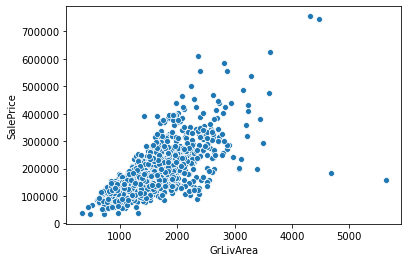

In [12]:
# Documentation indicates that there are some outliers that can be seen in plot of GrLivArea vs SalePrice
#plt.scatter(train['GrLivArea'], train['SalePrice'])
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

From the above plot, we can see that there are some outliers in the SalePrice vs GrLivArea plot (those with GrLivArea bigger than 4000 and SalePrice less than 300000). 

## Missing Data

Description of missing data from documentation:
  Meaning of missing values from Serigne's notebook (https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard):
    - For these features, NA means or probably means 'None': PoolQC, MiscFeature, Alley, Fence, FirePlaceQu, GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBuilt, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2, MasVnrType, MSSubClass
    - For these features, NA means or probably means 0: GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea
    - For these features, NA means or probably means 'unknown': MSZoning, Utilities, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType
    - For 'Functional', NA means 'Typical'

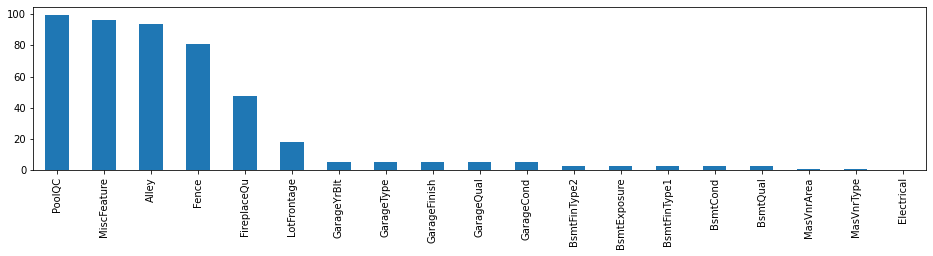

In [13]:
missing_percent = (train.isnull().sum()/len(train)) * 100
plt.figure(figsize=(16, 3))
missing_percent = missing_percent[missing_percent >  0]
missing_percent.sort_values(ascending=False).plot.bar(rot=90)

## Distribution of Target Variable

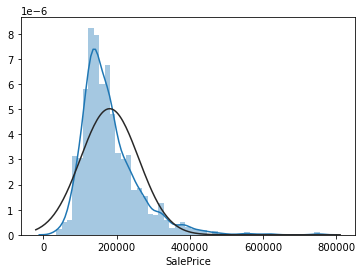

In [14]:
sns.distplot(train['SalePrice'], fit=norm)

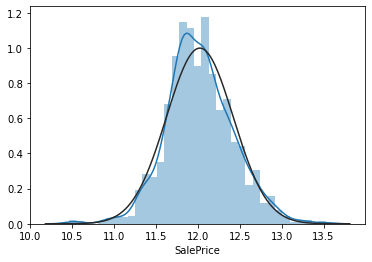

In [15]:
sns.distplot(np.log1p(train['SalePrice']), fit=norm)

The target variable, SalePrice, has a heavily right-skewed distribution. The logarithm of SalePrice is close to a normal distribution for its central values.

## Distribution of Numeric Features

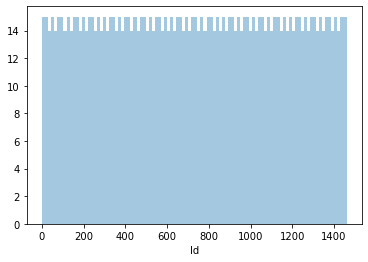

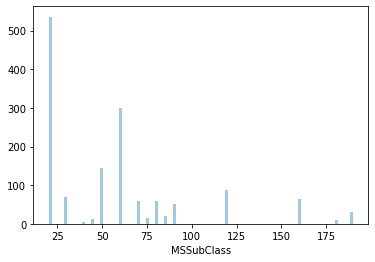

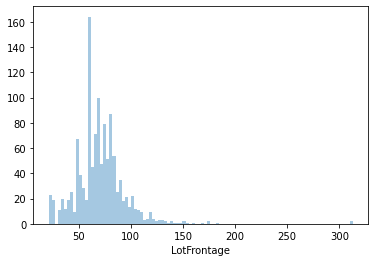

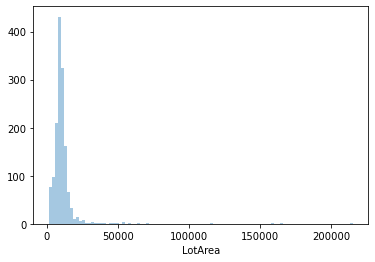

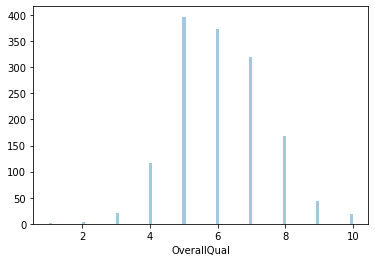

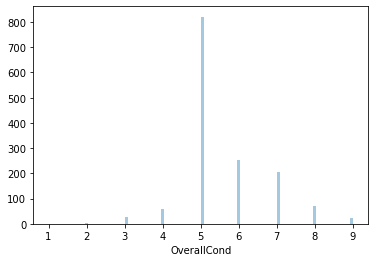

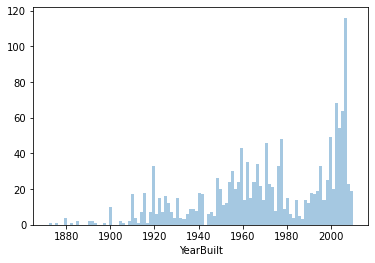

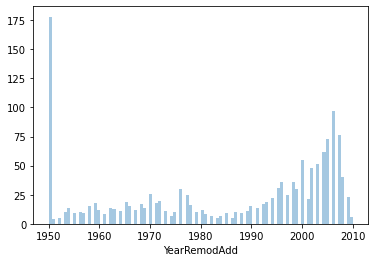

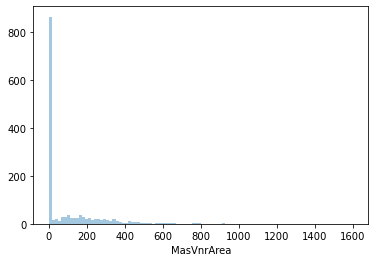

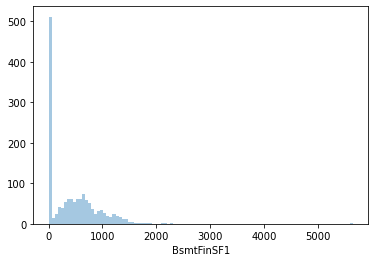

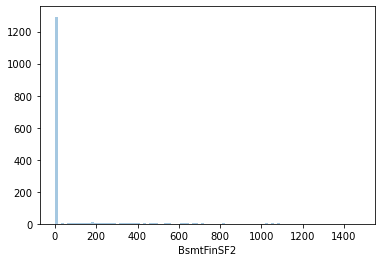

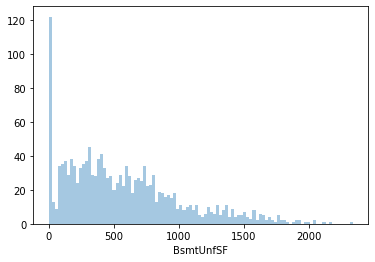

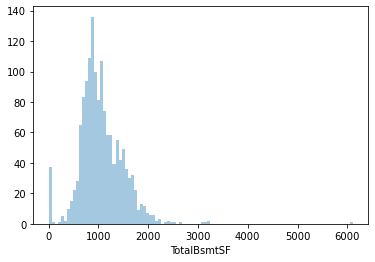

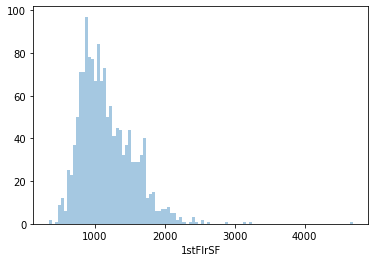

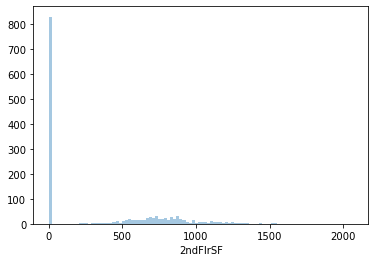

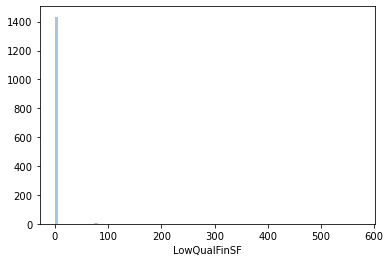

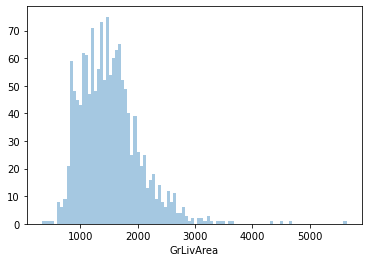

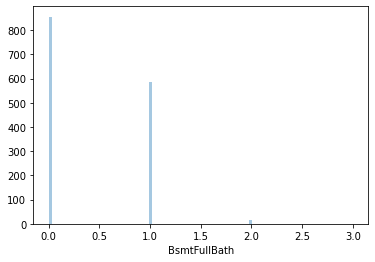

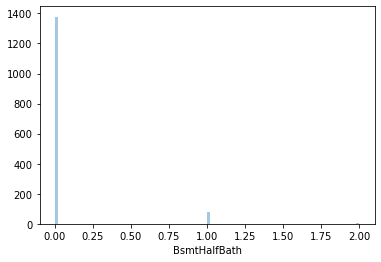

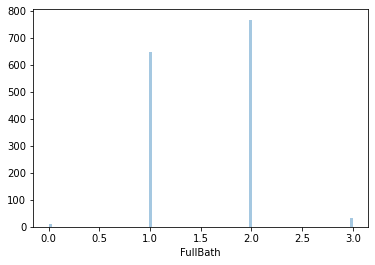

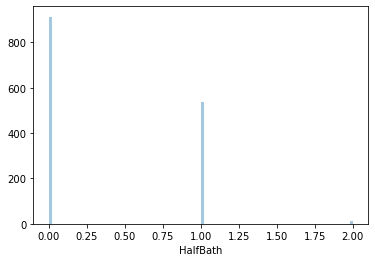

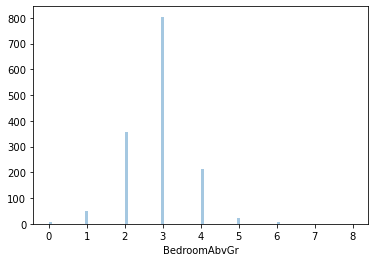

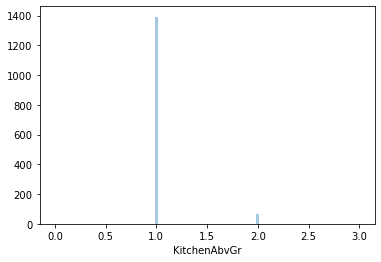

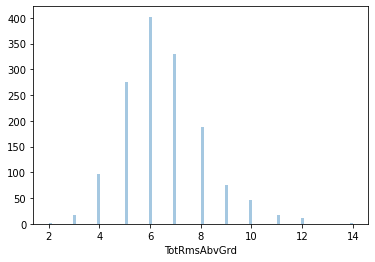

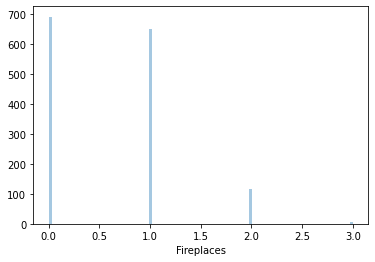

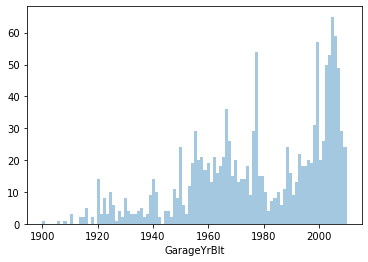

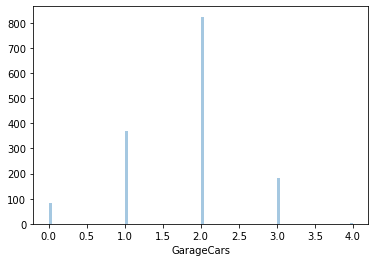

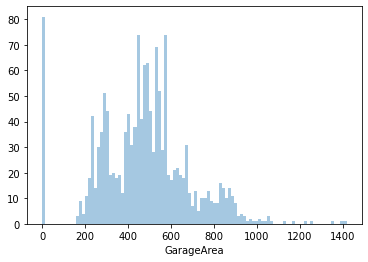

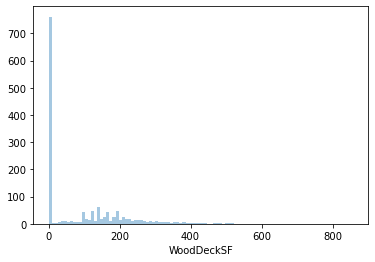

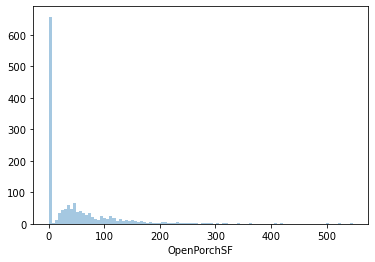

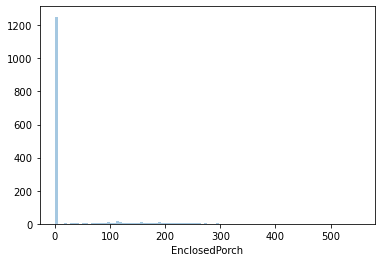

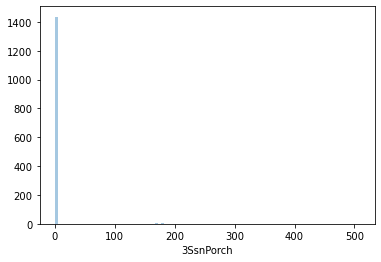

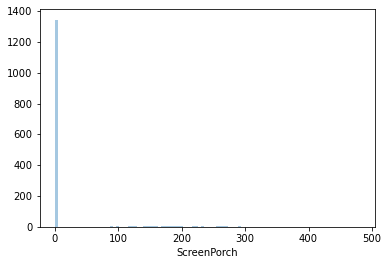

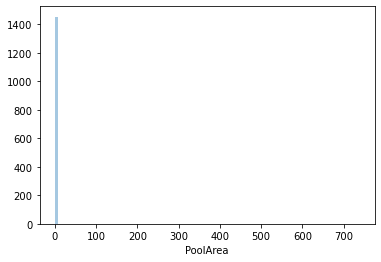

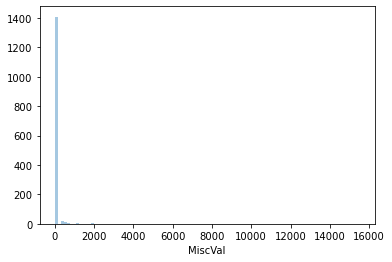

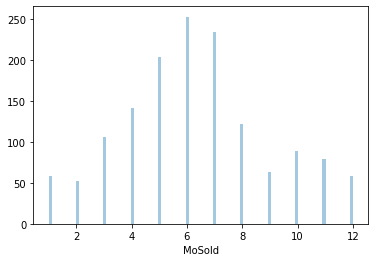

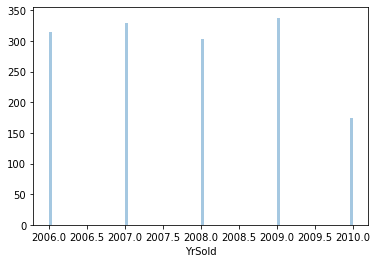

In [16]:
for feature in numerical:
    f = plt.figure()
    sns.distplot(train[feature].astype(float), bins=100, kde=False)

Almost all of the features that characterize the size of some part of the house (LotFrontage, LotArea, BsmtFinSF1, etc.) are right-skewed.

In addition, many features have a lot or most of their values at zero (GarageArea, WoodDeckSF, PoolArea). The zero points essentially indicate a lack of the thing that is being quantified. It could be useful to add binary features indicating whether these features are present, which could make it easier for some models to estimate SalePrice accurately.

## Relationship of Numeric Features with SalePrice

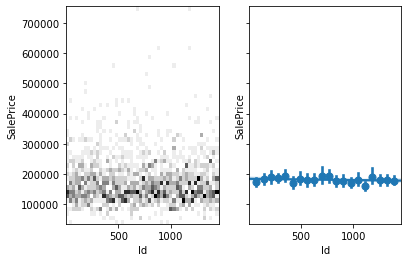

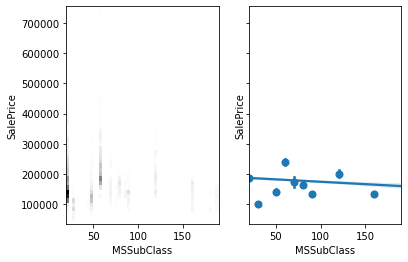

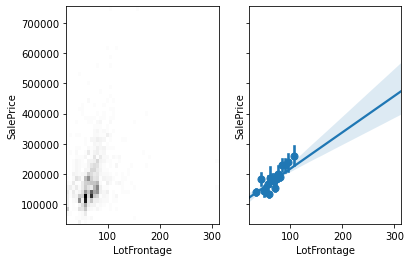

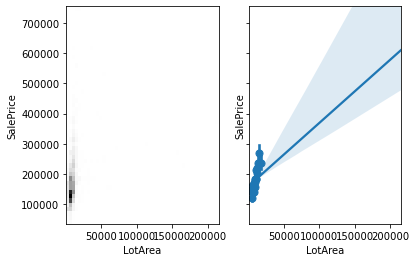

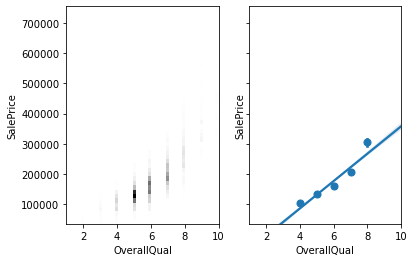

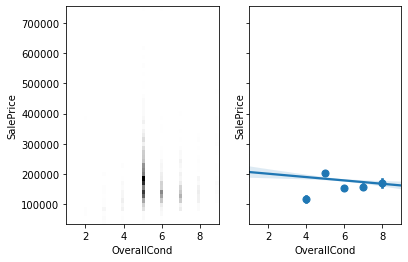

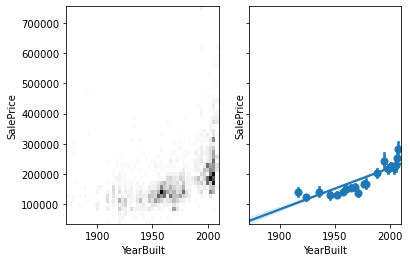

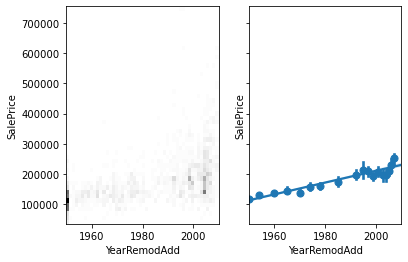

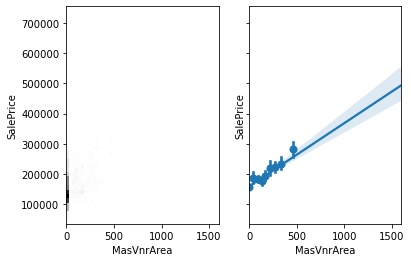

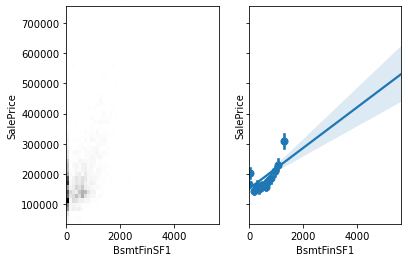

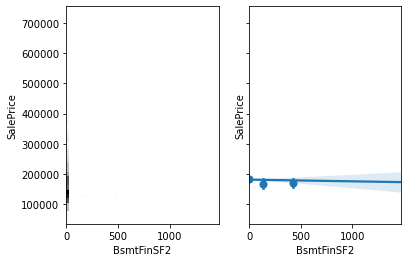

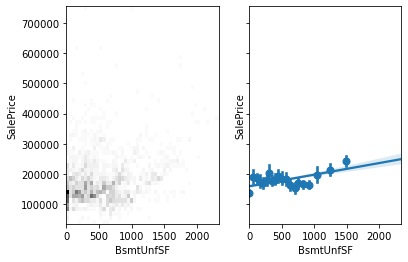

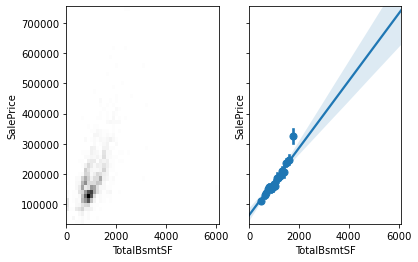

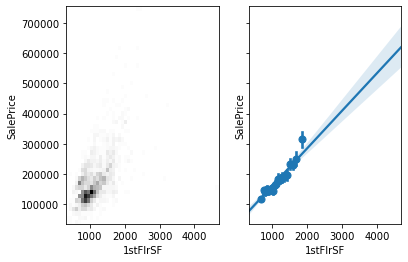

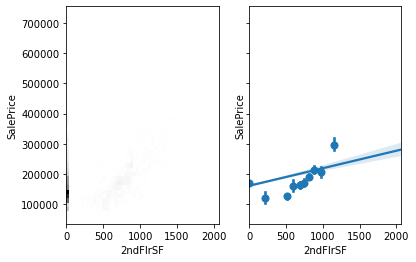

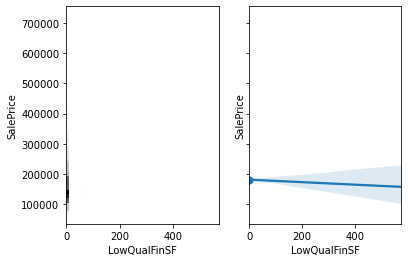

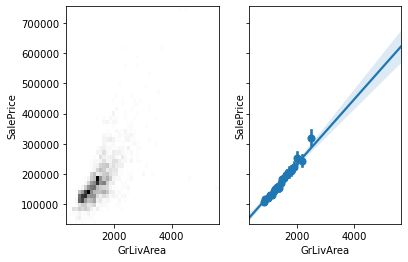

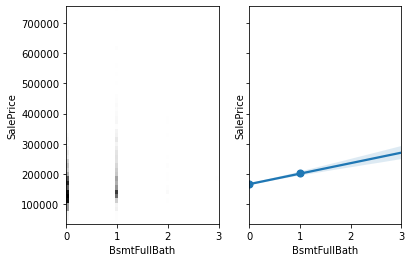

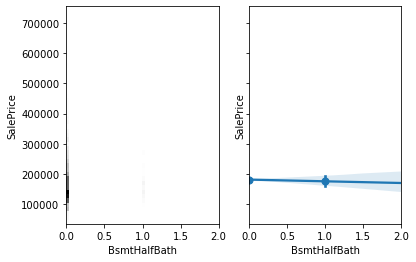

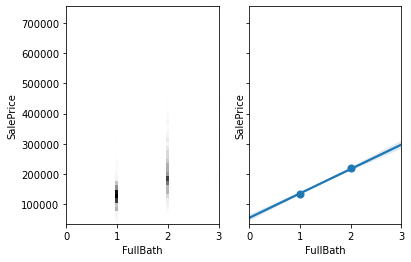

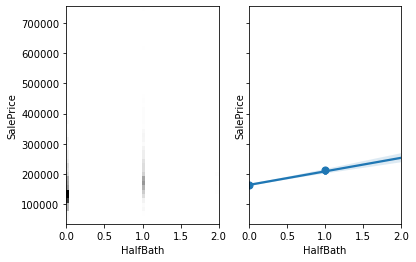

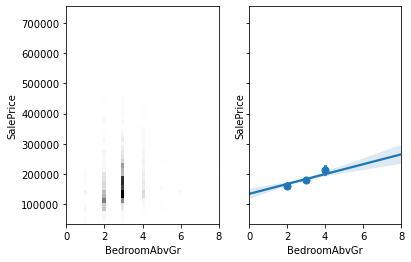

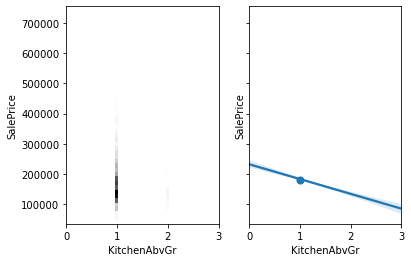

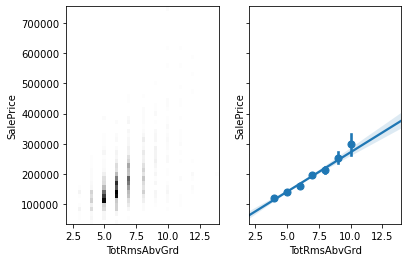

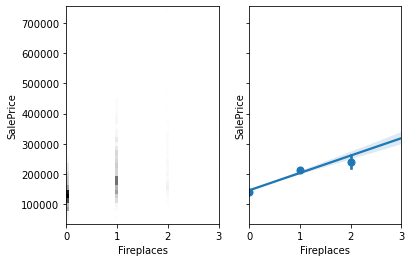

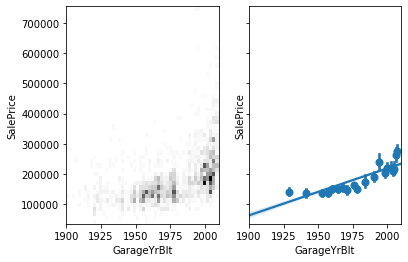

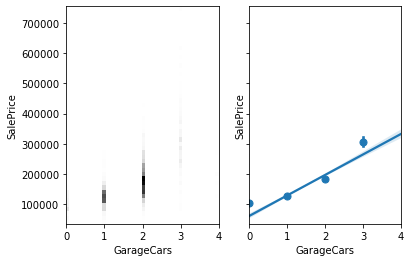

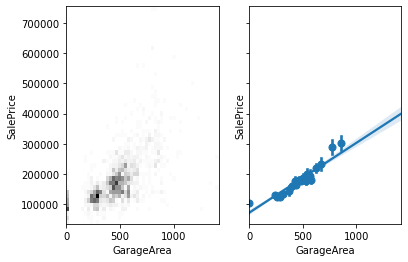

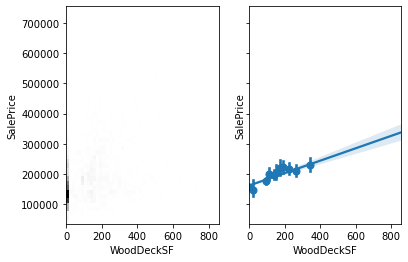

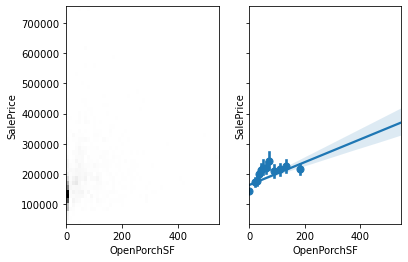

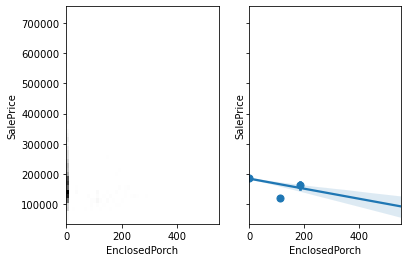

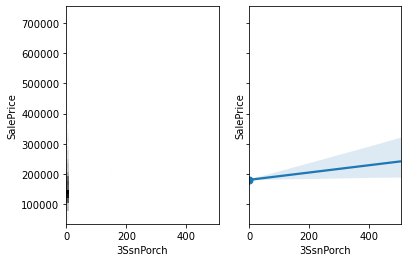

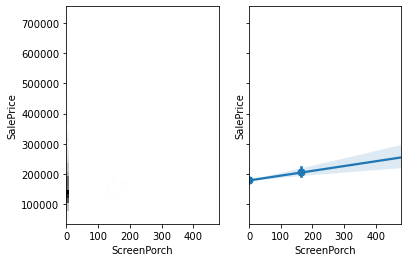

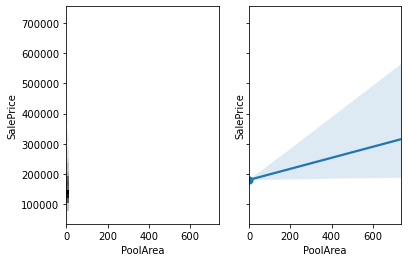

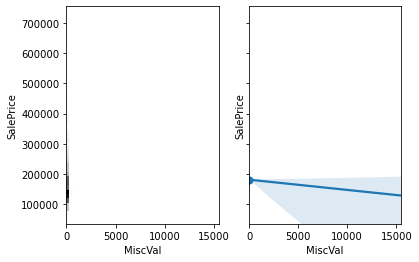

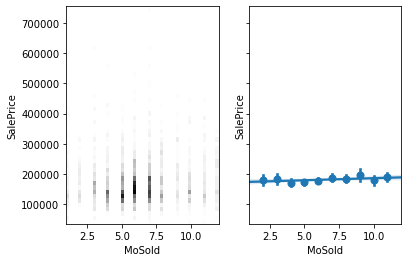

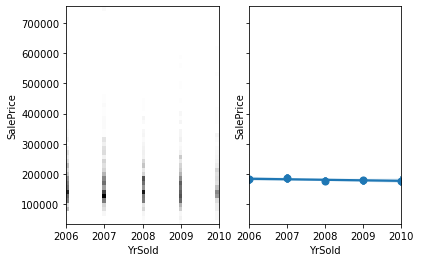

In [17]:
for feature in numerical:
    f, axs = plt.subplots(1, 2, sharey=True)
    isnotnan = ~np.isnan(train[feature])
    axs[0].hist2d(train[feature][isnotnan], train['SalePrice'][isnotnan], bins=50, cmap='Greys')
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel('SalePrice')
    sns.regplot(x=feature, y='SalePrice', data=train, x_bins=20, ax=axs[1])

For most of the numeric features, there is a clear linear correlation between the feature and SalePrice. The SalePrice does not seem to be strongly influenced by YrSold or MoSold for the data shown here. For a few features, such as OpenPorchSF, BsmtFinSF1, there is a more complex nonlinear relationship with SalePrice.

## Distributions of Categorical Features and their Relationships with SalePrice

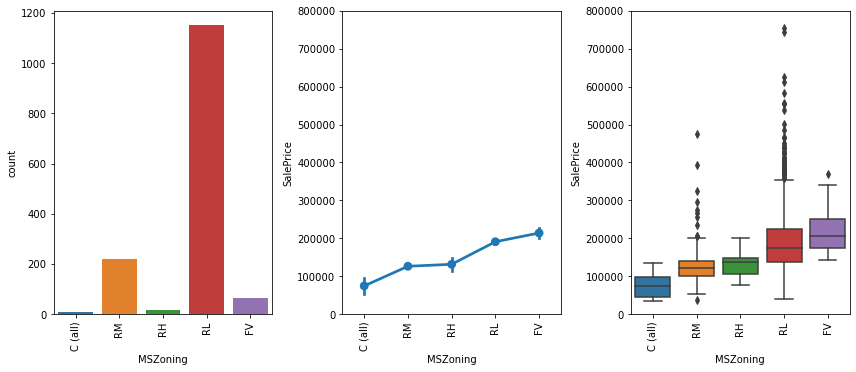

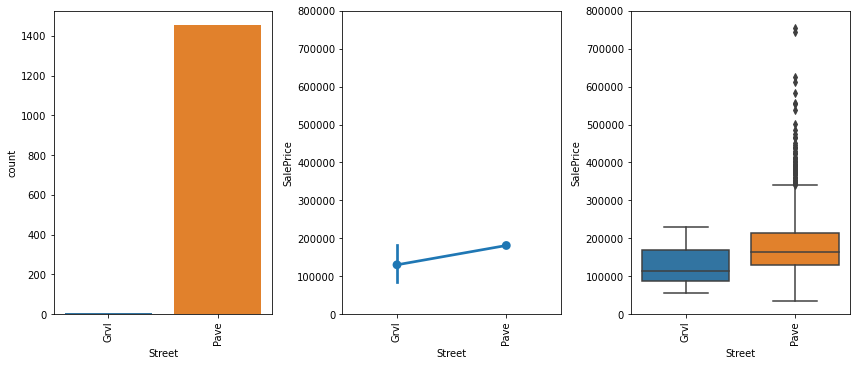

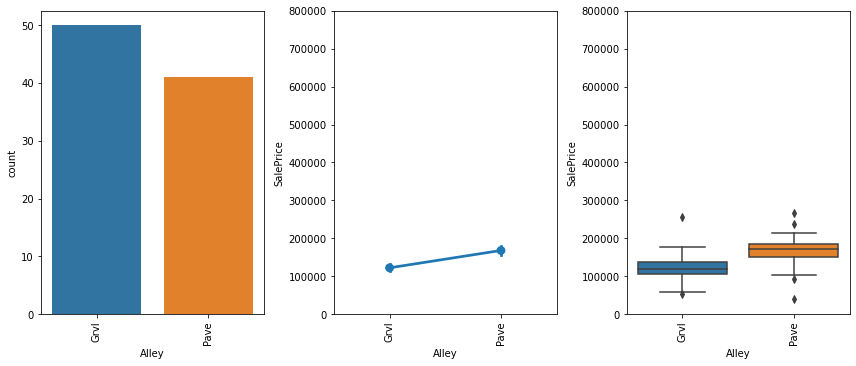

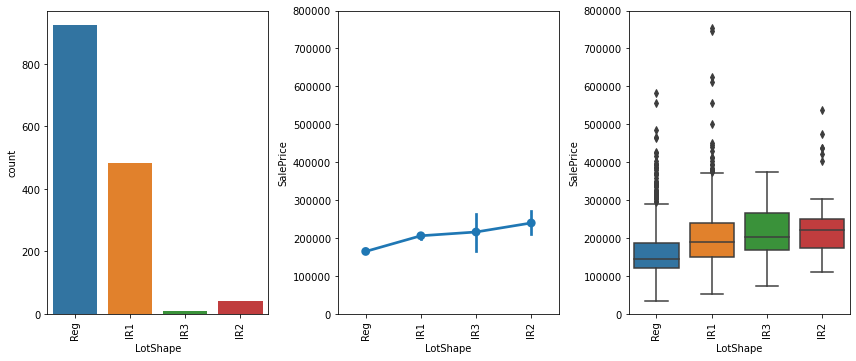

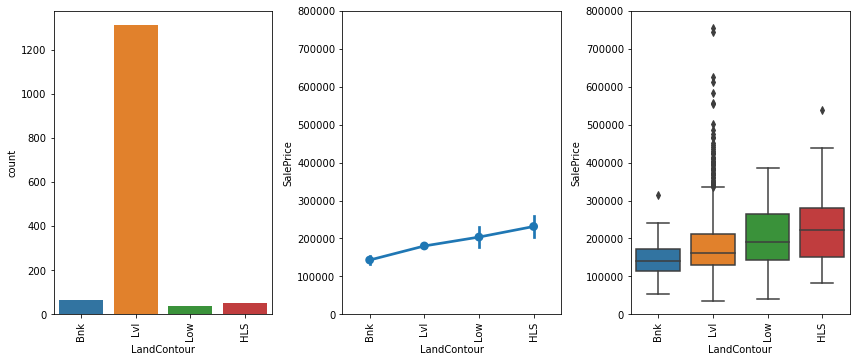

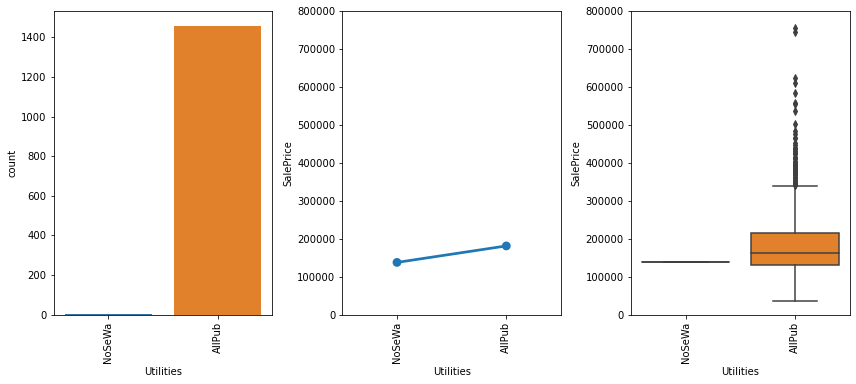

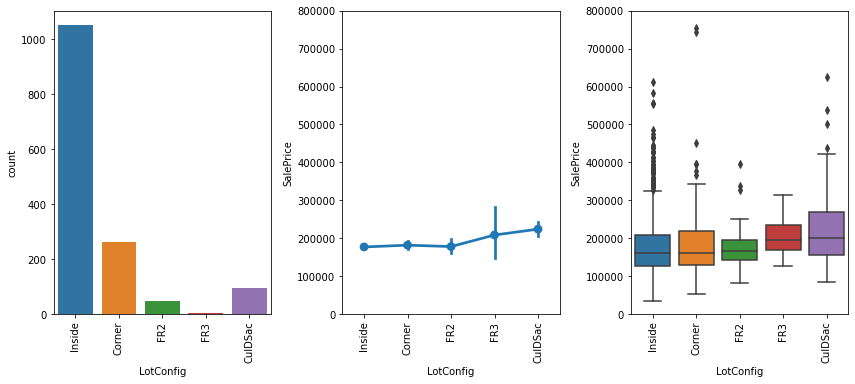

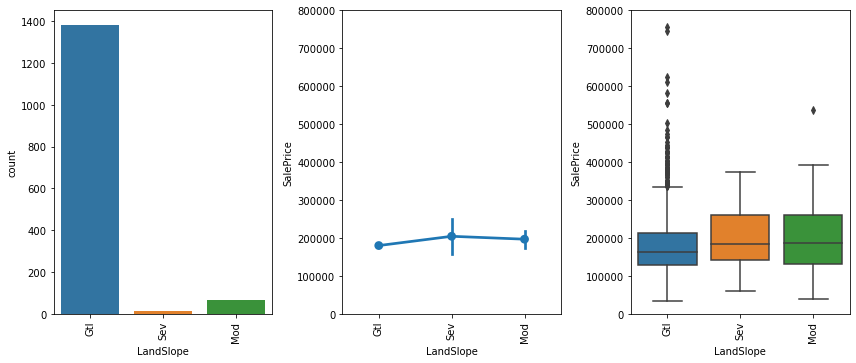

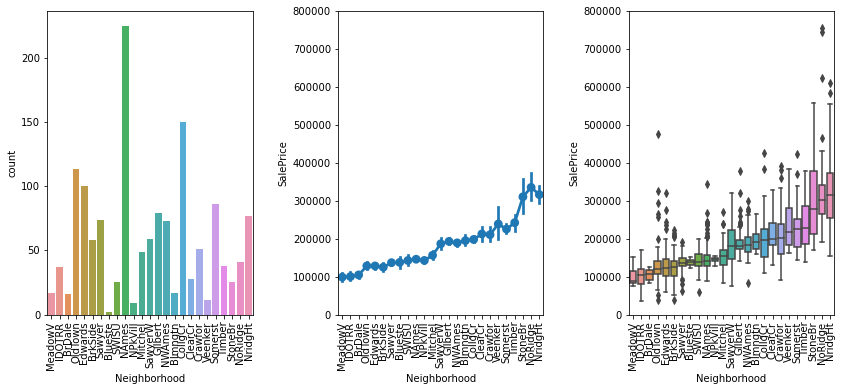

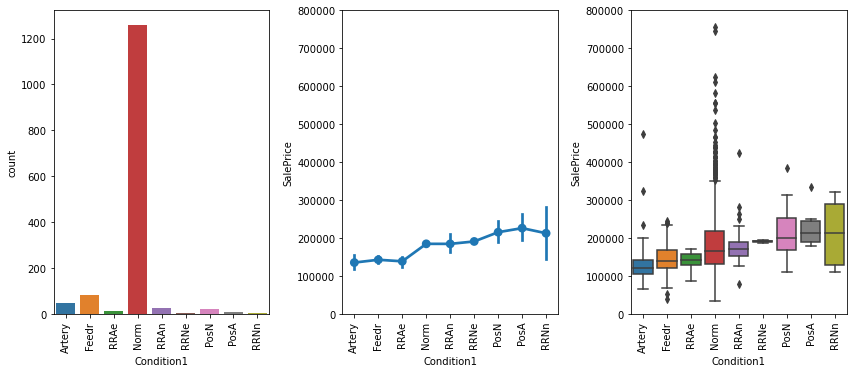

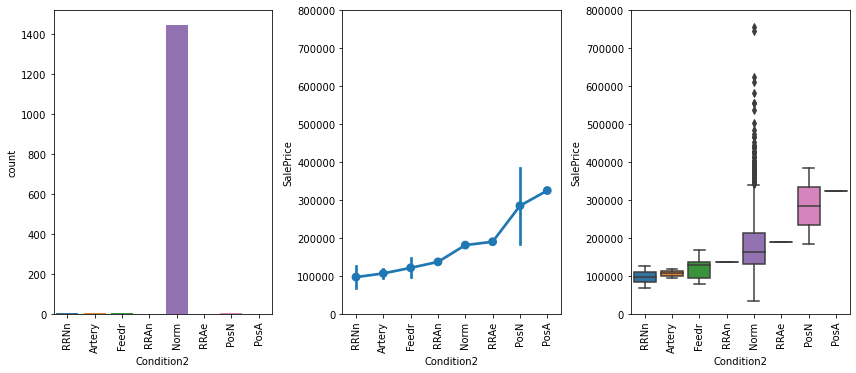

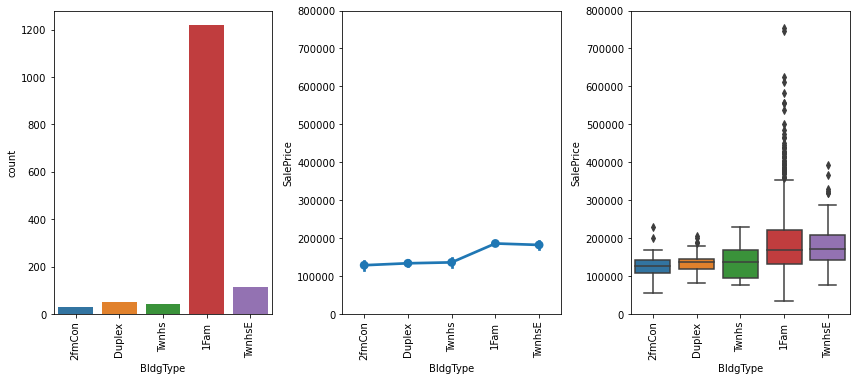

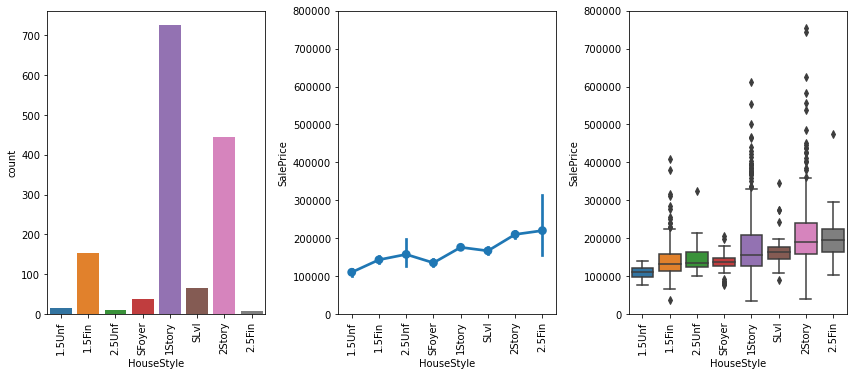

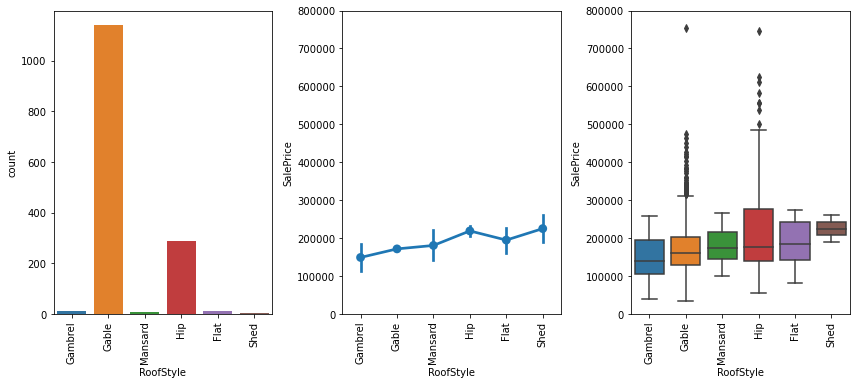

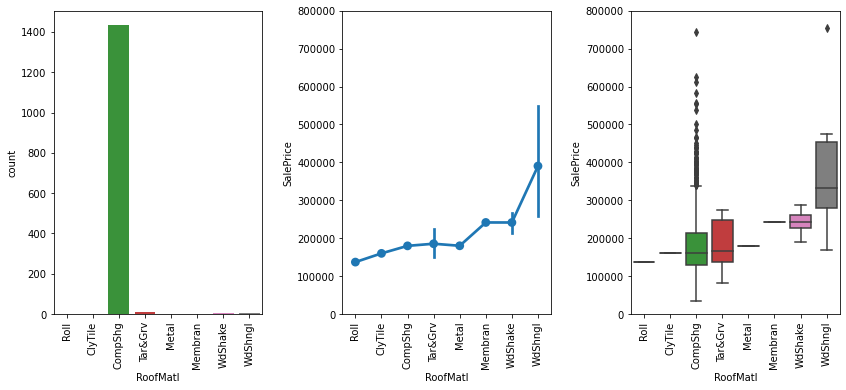

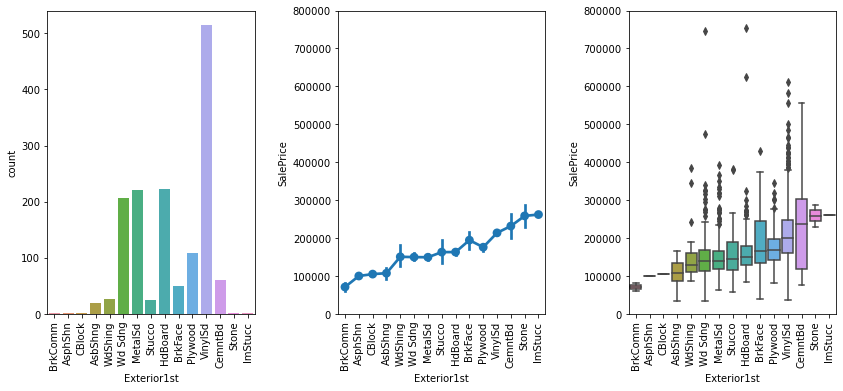

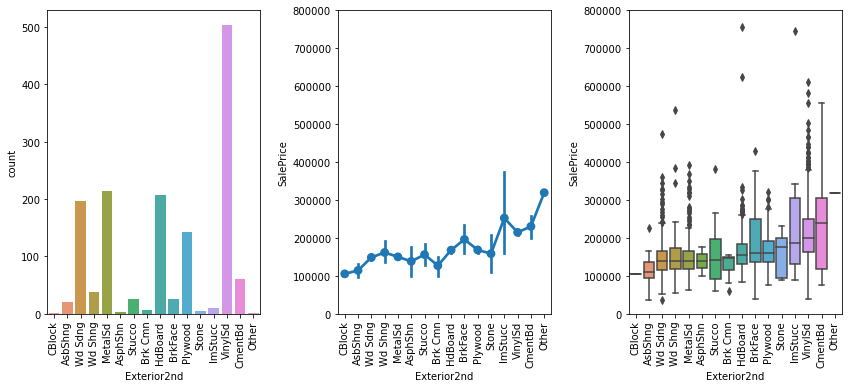

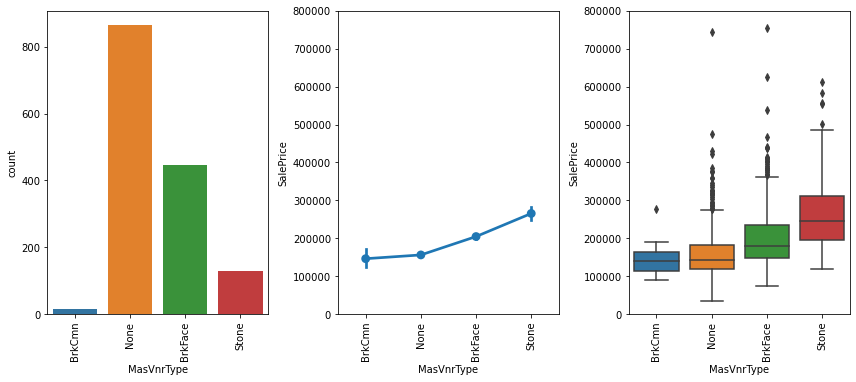

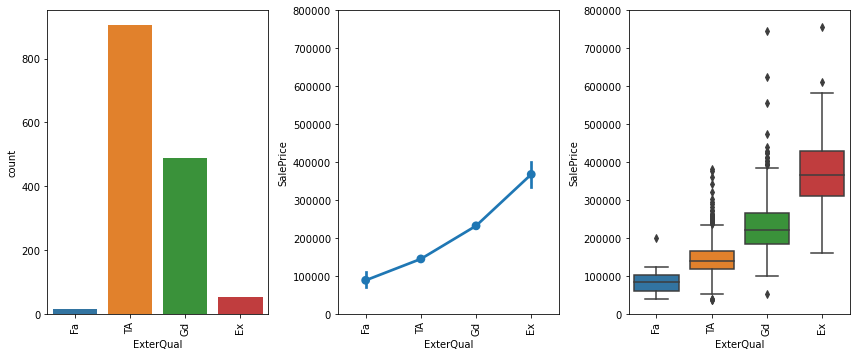

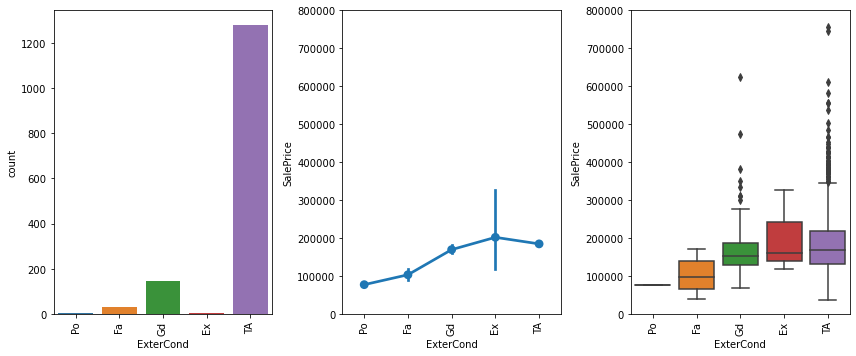

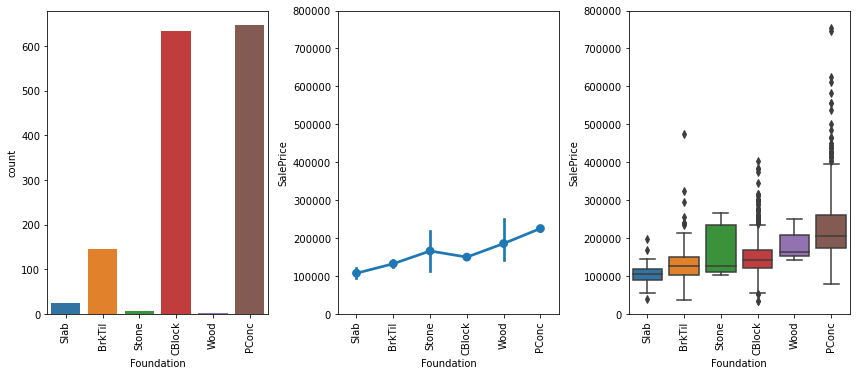

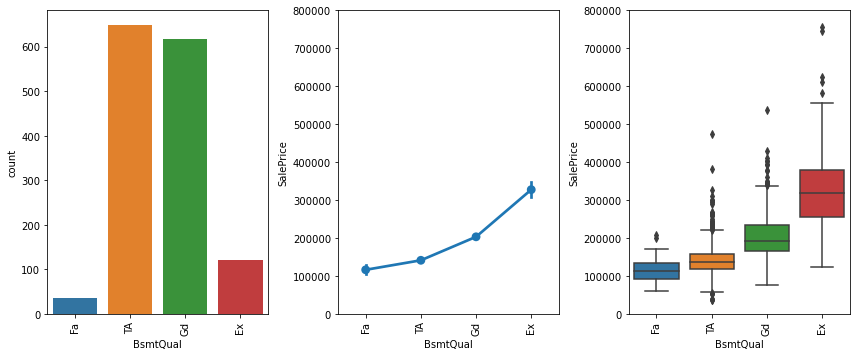

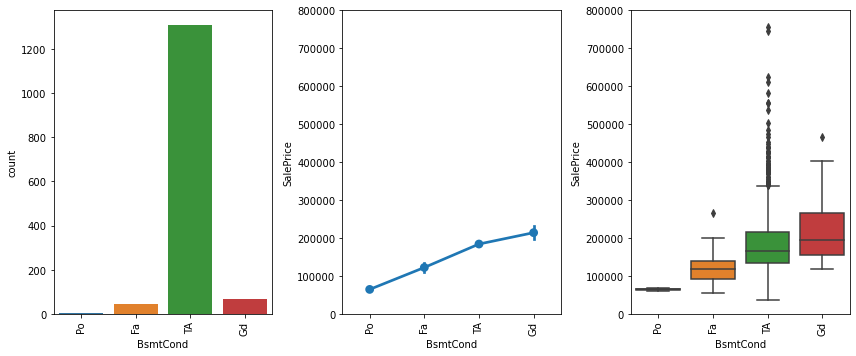

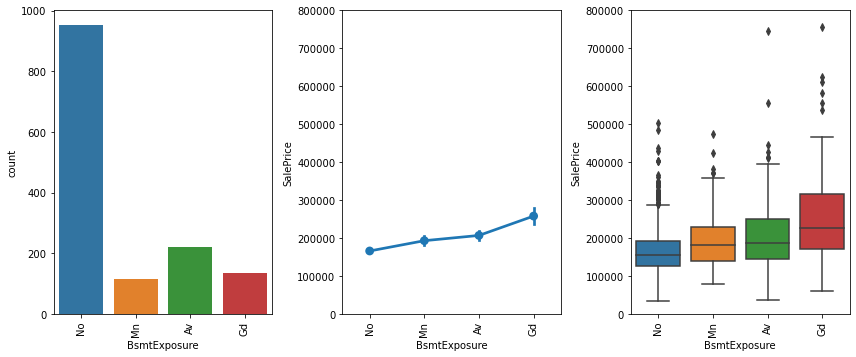

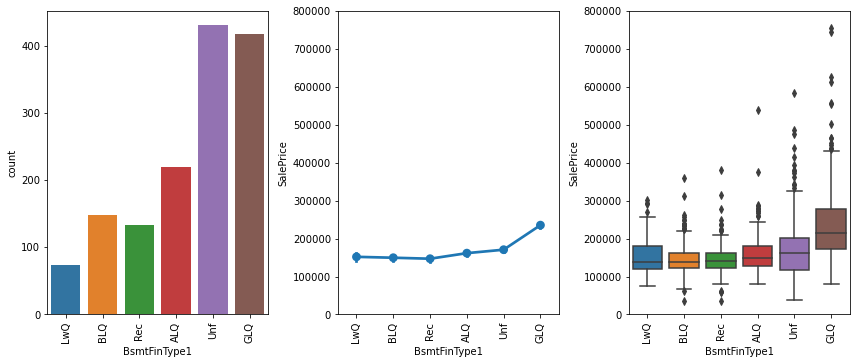

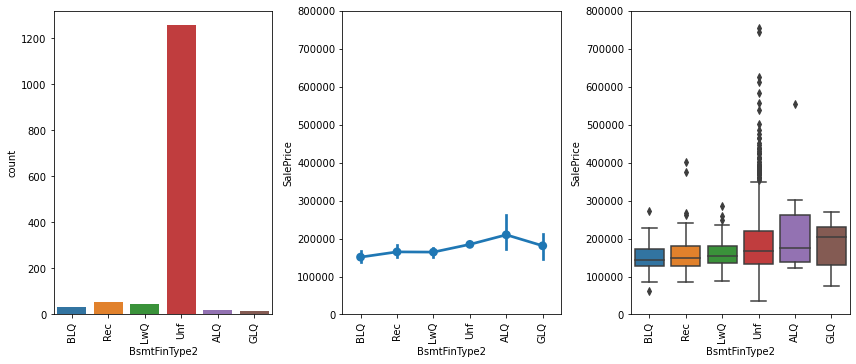

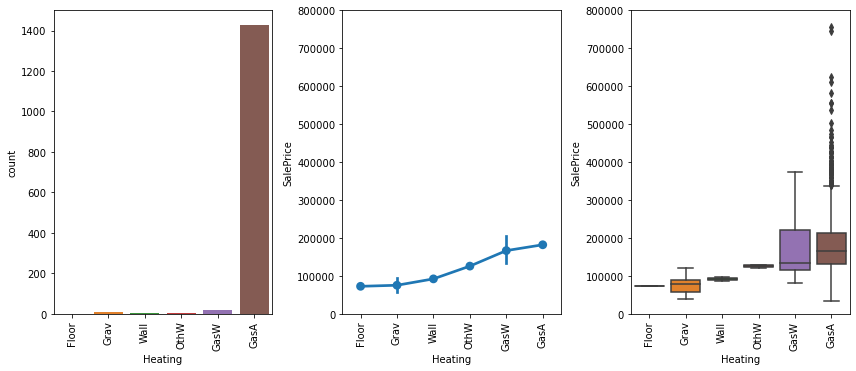

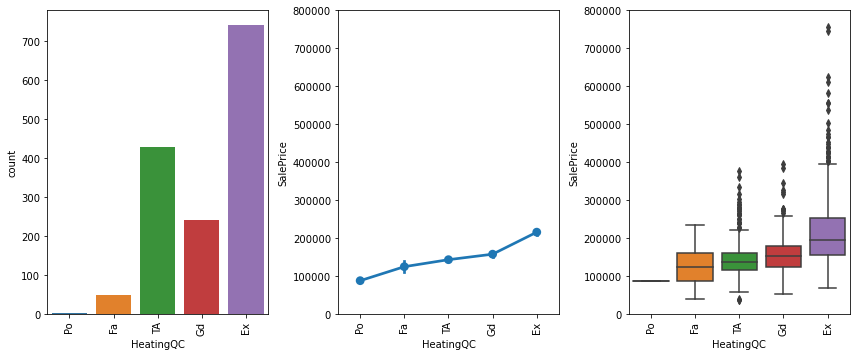

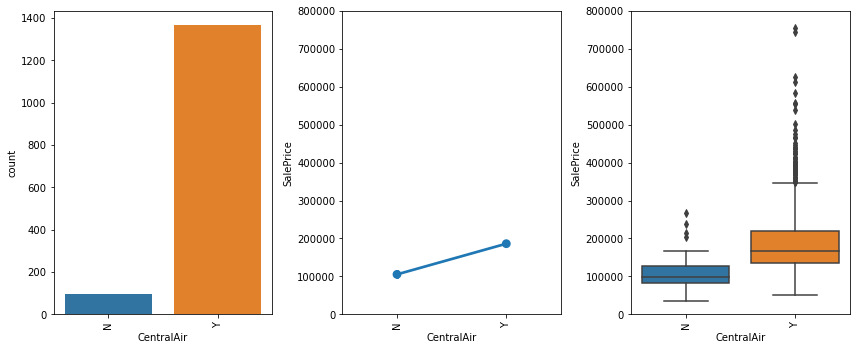

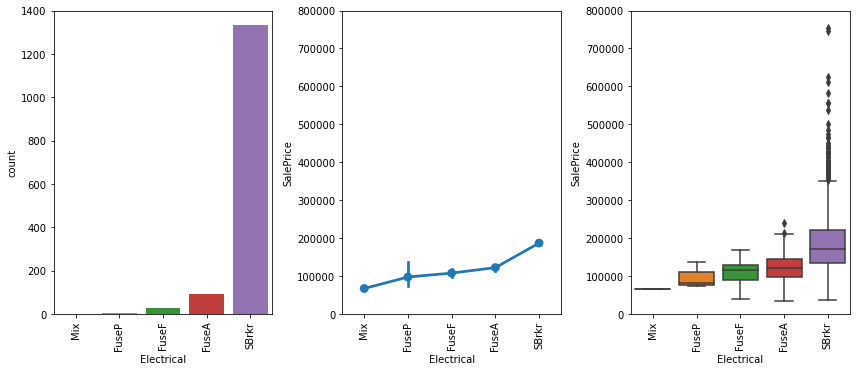

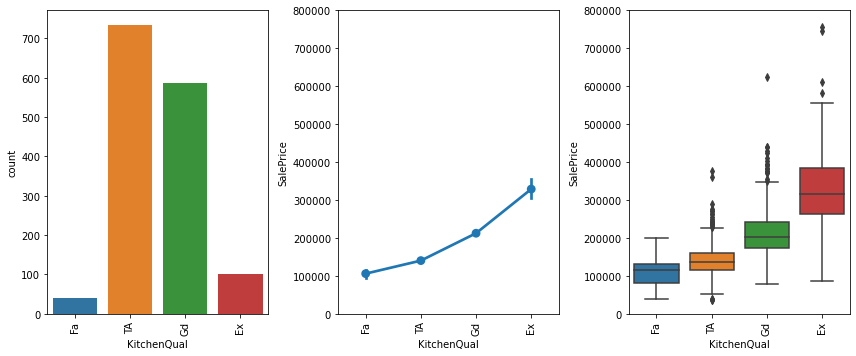

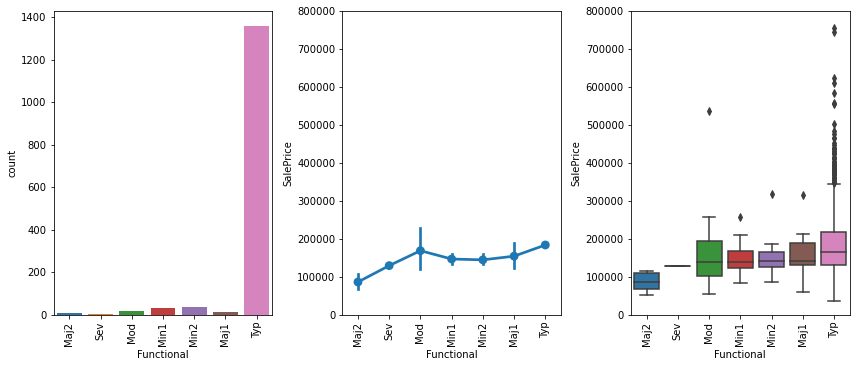

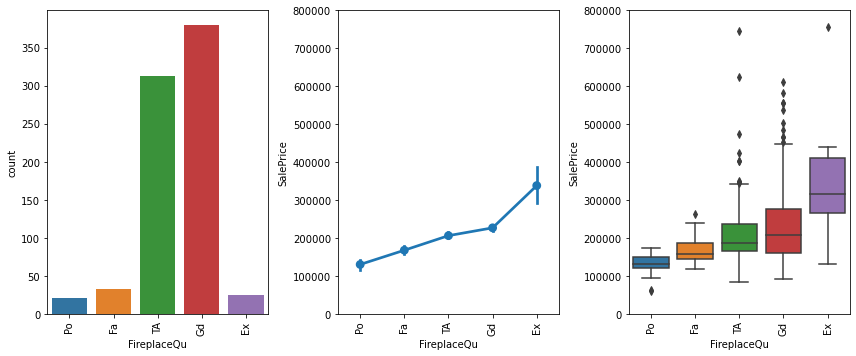

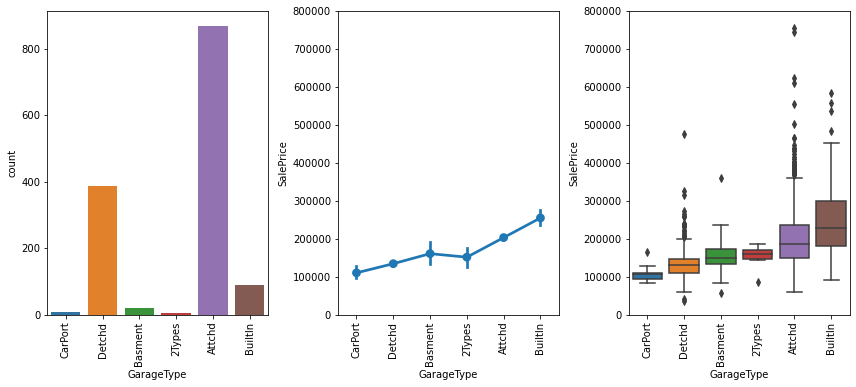

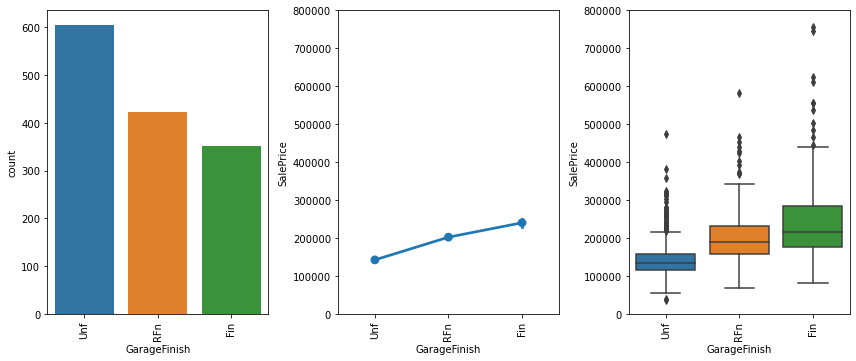

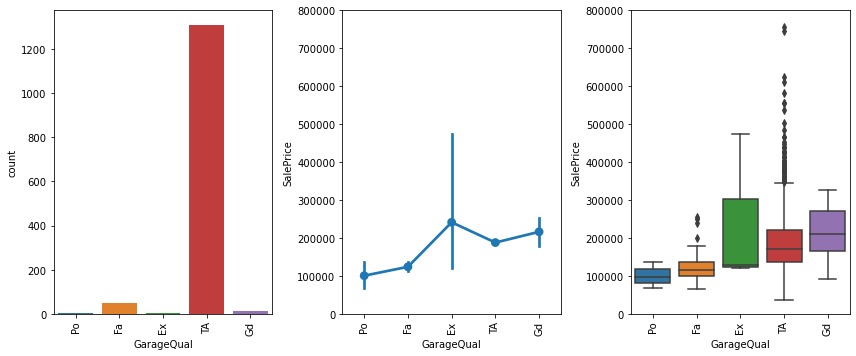

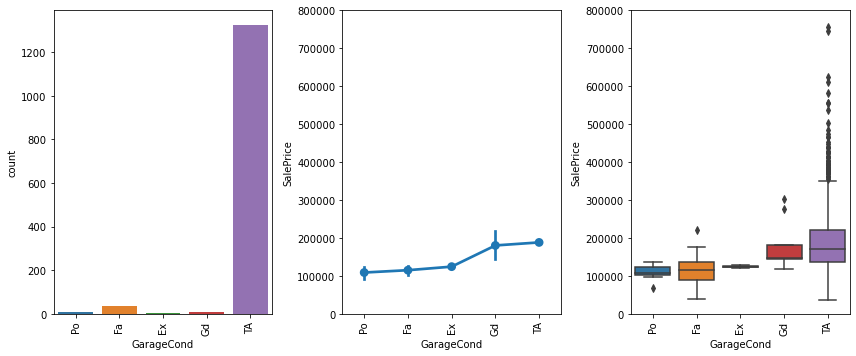

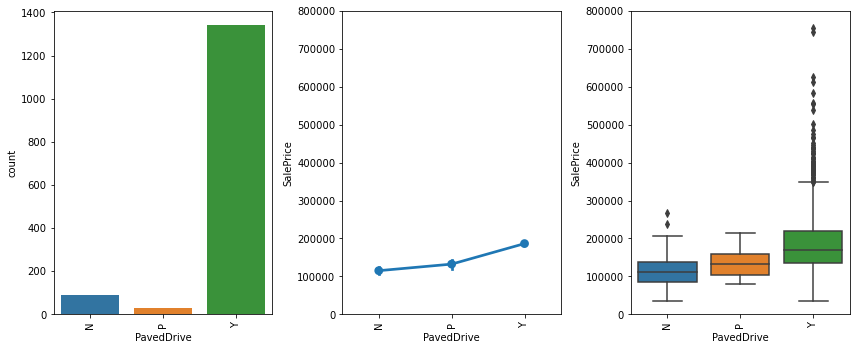

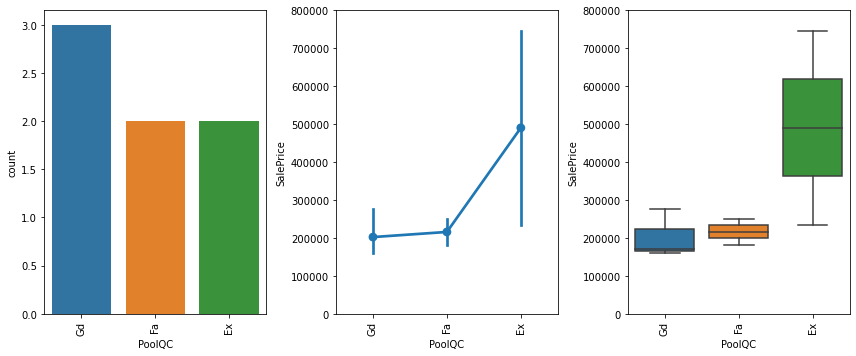

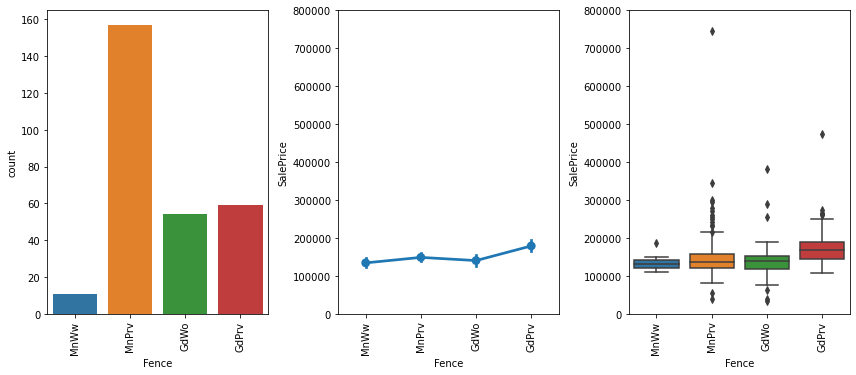

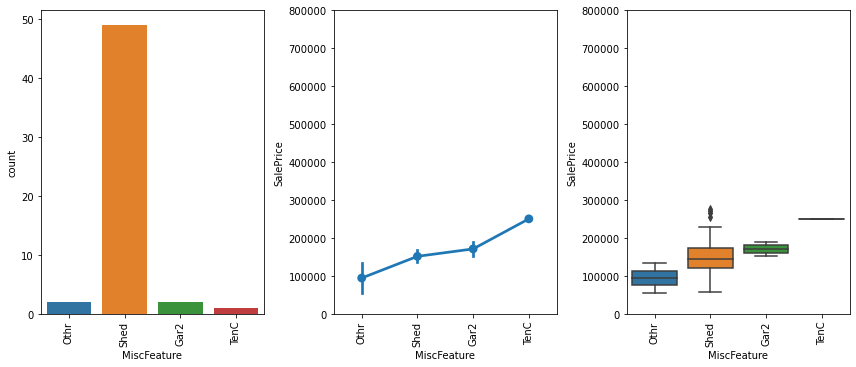

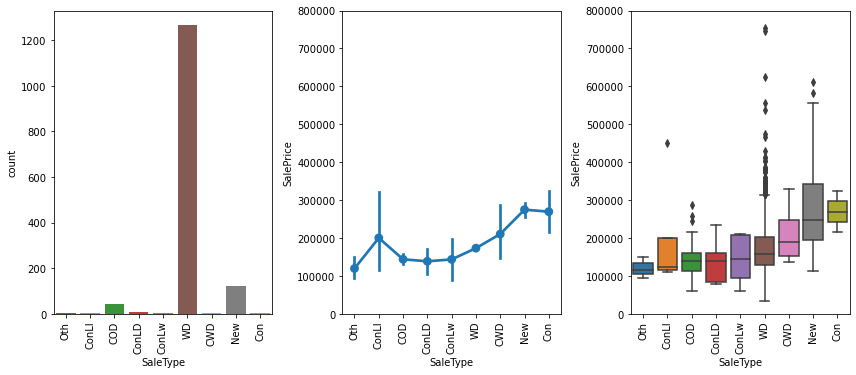

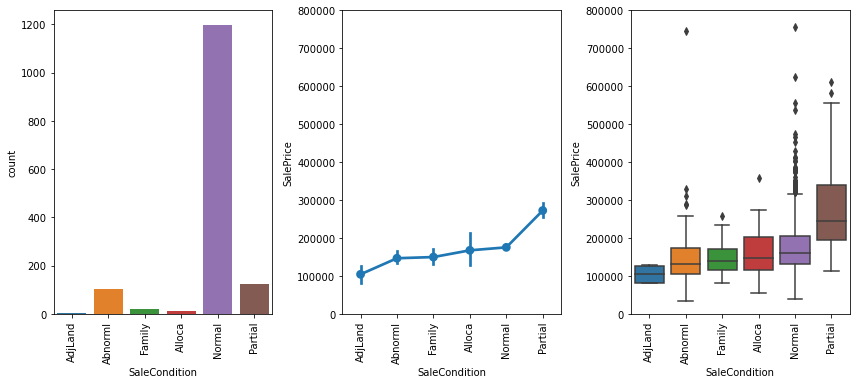

In [18]:
for var in categorical:
    f, axs = plt.subplots(1, 3, figsize=(12, 5))
    order = train.groupby(by=[var])['SalePrice'].median().sort_values(ascending=True).index
    sns.countplot(x=var, data=train, order=order, ax=axs[0])
    sns.pointplot(x=var, y='SalePrice', data=train, order=order, ax=axs[1])
    sns.boxplot(x=var, y='SalePrice', data=train, order=order, ax=axs[2])
    axs[1].set_ylim((0, 800000))
    axs[2].set_ylim((0, 800000))
    plt.tight_layout()
    for ax in axs:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

For several features, such as 'Street' and 'Condition2', the data is almost entirely a single value. Others, such as 'Neighborhood' and 'HouseStyle' have more data points with different values and have a strong relationship with SalePrice. These are likely to be important features in a machine learning model.

## Correlation of Numeric Features with SalePrice

Text(0.5, 1.0, 'Spearman Correlation of Features with Target')

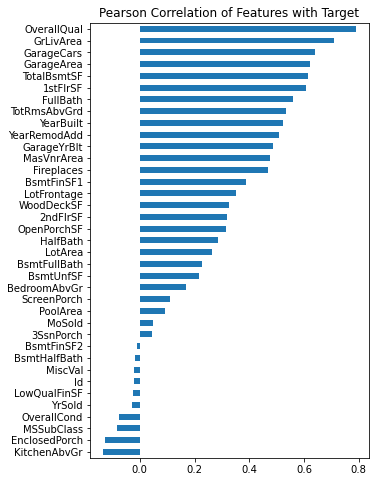

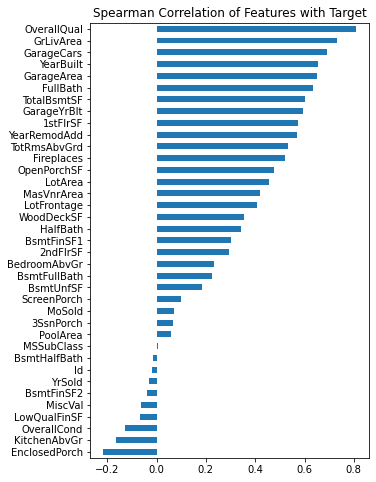

In [19]:
f = plt.figure(figsize=(5, 8))
train.corr(method='pearson')['SalePrice'].sort_values(ascending=True).drop(['SalePrice'], axis=0).plot.barh()
plt.title('Pearson Correlation of Features with Target')
f = plt.figure(figsize=(5, 8))
train.corr(method='spearman')['SalePrice'].sort_values(ascending=True).drop(['SalePrice'], axis=0).plot.barh()
plt.title('Spearman Correlation of Features with Target')

Unsurprisingly, OverallQual and GrLivArea are the numeric features most strongly correlated with SalePrice. GrLivArea is the total above ground living area and OverallQual assesses the overall quality of the house.

## Correlation of Numeric Features

Text(0.5, 1.0, 'Pearson Correlation of Features')

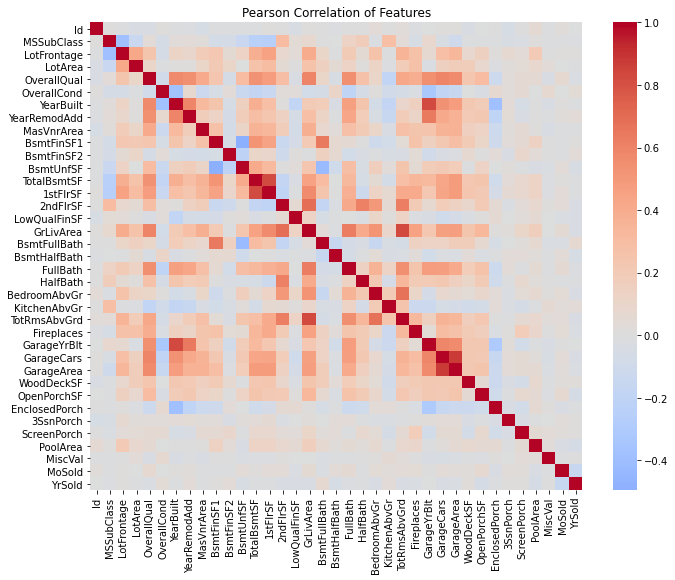

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.drop(['SalePrice'], axis=1).corr(), annot=False, cmap='coolwarm', fmt='.2f', center=0)
plt.tight_layout()
plt.title('Pearson Correlation of Features')

Most of the feature pairs have little to moderate correlation with eachother. There are some that are unsurprisingly highly correlated like YearBuilt and GarageYrBuilt, as well as GarageCars and GarageArea.

Also unsurprisingly, features characterizing the size of different parts of the house are correlated. For instance, GrLivArea is correlated with LotArea and 1stFlrSF. Interestingly, though, 1stFlrSF has moderate negative correlation with 2ndFlrSF.